# Supply Chain Analysis: Solving Inventory Problems
## Calculating Order Size for Deterministic Demand

In [1]:
# Libraries
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

### Calculate an economic order quantity (EOQ)
The number of items that minimizes your total cost:

$$
EOQ = \sqrt{\frac{2 * Setup Cost * Flow Rate}{Holding Cost}}   
$$

In [2]:
# Calculate EOQ

setup_cost = 120.00            # what it costs to place an order
flow_rate = 1800               # the number of units that you expect to order in a year (Demand)
item_cost = 45.00              # the wholesale costs that you pay for each item
inventory_percentage = 0.20    # the percent of an item's value that our company assumes it costs to keep an item on hand for a year

holding_cost = item_cost * inventory_percentage

eoq = math.sqrt ((2 * setup_cost * flow_rate)/(holding_cost))

print('Holding Cost:',round(holding_cost,2))
print('EOQ:',round(eoq,2))

Holding Cost: 9.0
EOQ: 219.09


### Calculate orders per year and time between orders

We calculate the economic order quantity, which is the number of items per order, that minimizes your overall cost. With that information in hand, you can determine the number of orders we've placed per year, and also the time between orders. We can use that information to plan our inventory management and order processes effectively.

In [3]:
# Orders per Year and Time between Orders

demand_year = flow_rate             # demand per year
orders_year = demand_year / eoq     # orders per year
days_between = 365 / orders_year    # days between orders

print('Demand per year:',round(demand_year,2))
print('Orders per year:',round(orders_year,2))
print('Days between orders:',round(days_between,2))

Demand per year: 1800
Orders per year: 8.22
Days between orders: 44.43


### Calculate effects of lead time

When you calculate the basic economic order quantity, we assume that orders are delivered immediately and of course, that's unrealistic. We need to consider the time between placing an order and when it's delivered to accurately judge our needs. Let's see how to account for lead time.

In [4]:
# Calculate effects of lead time

lead_time = 3                                    # lead Time in days
replenish_level = (demand_year/365) * lead_time  # Replenishment Level

print('Replenishment Level:',round(replenish_level,2))

Replenishment Level: 14.79


So it appears that if I have 15 items on hand that I place my order and I won't miss any sales based on average demand. You might be wondering if this affects the days between orders. It does, but only the first one because we have a lead time of three days. That means that the first order will need to be placed after 44.43 minus 3 days or 41.43. After that, because none of our parameters change, we will place our order every 44.43 days, but because we start at zero and we need to catch up to demand, the first one will take place about three days early.

### Determine increased cost of constrained purchases

When we calculate an economic order quantity, we identify how many items we should order to minimize order costs. However, we can't always order that exact amount. Suppliers might require we to order in increments of say 30 and our job is to find the lowest cost quantity that we can order while meeting their policy. 

In [5]:
quantityQ = np.array([30,60,90,120,150,180,210,240,270,300])  # Quantity (the supplier requires us to order in increments of 30)
order_costQ = (flow_rate/quantityQ) * setup_cost              # Order Cost by quantity
holding_costQ = 0.5 * quantityQ * holding_cost                # Holding Cost based on average inventory (half of the quantity)
total_cost = order_costQ + holding_costQ                      # Total Cost (based in Order Cost and Holding Cost)

# Create a Data Frame
data = {'Quantity': quantityQ, 
        'Order Cost': order_costQ,
        'Holding Cost': holding_costQ,
        'Total': total_cost}

panel = pd.DataFrame(data)
panel = panel.set_index('Quantity')
panel['Order Cost'] = panel['Order Cost'].round(decimals = 2)
panel['Holding Cost'] = panel['Holding Cost'].round(decimals = 2)
panel['Total'] = panel['Total'].round(decimals = 2)
panel

,Order Cost,Holding Cost,Total
Quantity,,,
30,7200.00,135.0,7335.00
60,3600.00,270.0,3870.00
90,2400.00,405.0,2805.00
120,1800.00,540.0,2340.00
150,1440.00,675.0,2115.00
180,1200.00,810.0,2010.00
210,1028.57,945.0,1973.57
240,900.00,1080.0,1980.00
270,800.00,1215.0,2015.00


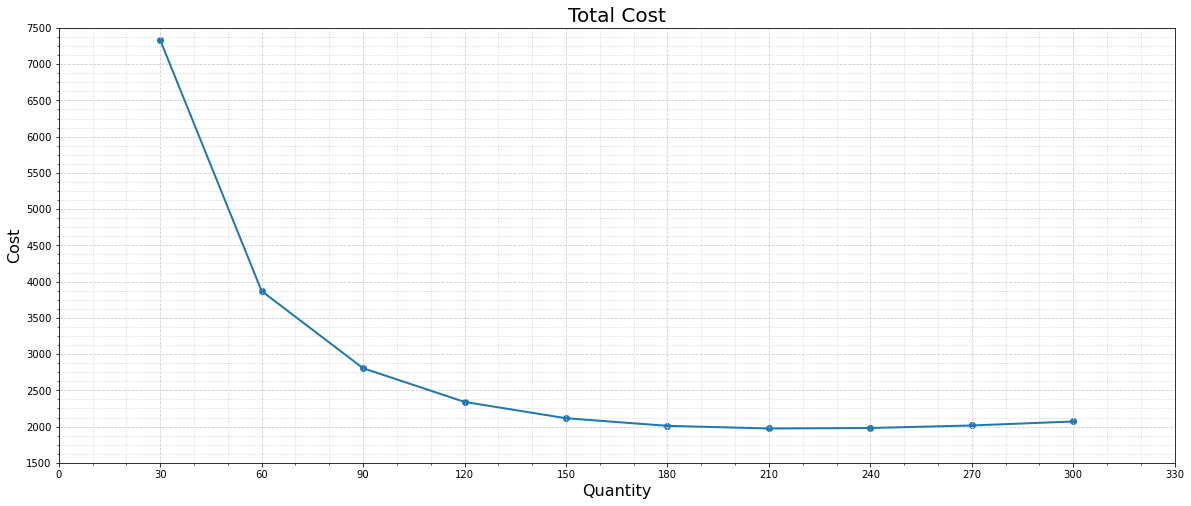

In [6]:
# Plot Graph

fig, ax = plt.subplots(figsize=(20, 8))

# Set axis ranges
ax.set_xlim(0, 330)
ax.set_ylim(1500, 7500)

# Change major ticks to show every 30/500.
ax.xaxis.set_major_locator(MultipleLocator(30))
ax.yaxis.set_major_locator(MultipleLocator(500))

# Change minor ticks to show every 10 (30/3 = 10)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

# Turn grid on for both major and minor ticks and style minor slightly differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

plt.plot(quantityQ, total_cost, linewidth=2.0)
plt.scatter(quantityQ, total_cost)
plt.xlabel('Quantity', fontsize = 16)               
plt.ylabel('Cost', fontsize = 16)         
plt.title('Total Cost', fontsize = 20) 
plt.grid(True)
plt.show()

### Examine the effect of quantity discounts on cost

If you have ever purchased items for a store inventory or T-shirts for a club, you know that manufacturers give discounts if you purchase large quantities of those items. let's see how to calculate the cost of ordering at certain minimum levels to find the lowest overall cost to our business.

**This table identifies discounts and discounted prices for different ordering levels**

| Discount Level | Quantity | Discount | Discount Price |
| --- | --- | --- | --- |
| 1 | 0 to 150 | 0 | 45.00 |
| 2 | 151 to 300 | 2% | 44.10 |
| 3 | 301 to 800 | 5% | 42.75 |
| 4 | 801 and above | 10% | 40.50 |


In [7]:
# We need to change our economic order quantity accordingly with the discount level
# Remember: holding_cost = item_cost * inventory_percentage

eoq1 = math.sqrt ((2 * setup_cost * flow_rate)/(45.00 * inventory_percentage))
eoq2 = math.sqrt ((2 * setup_cost * flow_rate)/(44.10 * inventory_percentage))
eoq3 = math.sqrt ((2 * setup_cost * flow_rate)/(42.75 * inventory_percentage))
eoq4 = math.sqrt ((2 * setup_cost * flow_rate)/(40.50 * inventory_percentage))

print('EOQ1:',int(math.ceil(eoq1)))
print('EOQ1:',int(math.ceil(eoq2)))
print('EOQ1:',int(math.ceil(eoq3)))
print('EOQ1:',int(math.ceil(eoq4)))

EOQ1: 220
EOQ1: 222
EOQ1: 225
EOQ1: 231


In [8]:
discount_level = np.array([1,2,3,4])                   # Discount Level
item_price = np.array([45.00, 44.10, 42.75, 40.50])    # Item Price
order_quant = np.array([220,222,301,801])              # Order Quantity (based in EOQ's and Quantity Level)
annual_PC = flow_rate * item_price                     # Annual Product Cost
annual_OC = (setup_cost*flow_rate)/order_quant         # Annual Order Cost

# Annual Holding Cost (average of Item Price x Order Quantity x Inventory Percentage)
annual_HC = 0.5 * item_price * order_quant * inventory_percentage  

totalC = annual_PC + annual_OC + annual_HC    # Total Cost

# Create a Data Frame
data2 = {'Discount Level': discount_level, 
        'Item Price': item_price,
        'Order Quantity': order_quant,
        'Annual Product Cost': annual_PC,
        'Annual Order Cost': annual_OC,
        'Annual Holding Cost': annual_HC,
        'Total Cost': totalC}

discef = pd.DataFrame(data2)
discef = discef.set_index('Discount Level')
discef['Annual Product Cost'] = discef['Annual Product Cost'].round(decimals = 2)
discef['Annual Order Cost'] = discef['Annual Order Cost'].round(decimals = 2)
discef['Annual Holding Cost'] = discef['Annual Holding Cost'].round(decimals = 2)
discef['Total Cost'] = discef['Total Cost'].round(decimals = 2)
discef

,Item Price,Order Quantity,Annual Product Cost,Annual Order Cost,Annual Holding Cost,Total Cost
Discount Level,,,,,,
1,45.00,220,81000.0,981.82,990.00,82971.82
2,44.10,222,79380.0,972.97,979.02,81331.99
3,42.75,301,76950.0,717.61,1286.78,78954.38
4,40.50,801,72900.0,269.66,3244.05,76413.71


### Calculate production order quantities
Until now, we've taken on the role of a retailer that orders goods from suppliers. Now we will assume we're a manufacturer with our own production facility. Given a certain level of demand and other information, what quantity of products should we ask our production facility to make every day?

$$
Q = \sqrt{\frac{2 * Setup Cost * Flow Rate}{Holding Cost * (1 - \frac{Daily Demand}{Daily Production Rate})}}   
$$

In [9]:
# Production Orders

demand = 2500      # Demand (the number of items that your customers buy from you by year
setup_cost = 150   # Setup Cost (what it costs you to initiate a production run)
holding_cost = 10  # Holding Cost (holding costs of each item by year)
daily_PR = 25      # Daily Production Rate (how many items your factory or facility can turn out in a day)
daily_DR = 10      # Daily Demand Rate (the annual demand of 2,500 divided by 250 working days in a year )

# Efficient Production Quantity 
qProd = math.sqrt ((2 * setup_cost * demand)/(holding_cost *(1 - (daily_DR/daily_PR))))

print('Efficient Production Quantity:',round(qProd),'items.')

Efficient Production Quantity: 354 items.
